In [1]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import random 
import math
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
from mpl_toolkits.mplot3d import Axes3D
from blackjack3 import *

In [2]:
def mcOffPolicy(num_episodes):
    bj = BlackJack()
    init_state = [True, 13, 2]

    rhos_ratio, returns = [], []
    for i in range(0, num_episodes):
        _, reward, player_seq_plays = bj.playGame(init_state,None)

        target_wt, behave_wt = 1.0, 1.0
        for (usable_ace, player_state, dealer_card), action in player_seq_plays:
            if action != bj.getPlayerPolicySA(player_state):
                target_wt = 0.0
                break
            else:
                behave_wt *= 0.5
        rhos_ratio.append(target_wt/behave_wt)
        returns.append(reward)
    rhos_ratio, returns = np.asarray(rhos_ratio), np.asarray(returns)
    weighted_returns = rhos_ratio * returns

    cum_weighted_returns,cum_rhos_ratio = [],[]
    cum_wr_sum, cum_rho_sum = 0, 0
    for i in range(len(weighted_returns)):
        cum_wr_sum += weighted_returns[i]
        cum_weighted_returns.append(cum_wr_sum)
    for i in range(len(rhos_ratio)):
        cum_rho_sum += rhos_ratio[i]
        cum_rhos_ratio.append(cum_rho_sum)
        
    cum_weighted_returns, cum_rhos_ratio = np.asarray(cum_weighted_returns), np.asarray(cum_rhos_ratio)
    ts = np.arange(1, num_episodes + 1)
    ordinary_sampling_returns = cum_weighted_returns/ts

    weighted_sampling_returns = np.where(cum_rhos_ratio != 0, cum_weighted_returns/cum_rhos_ratio, 0)
    
    #print(ordinary_sampling_returns[0:10])

    return ordinary_sampling_returns, weighted_sampling_returns

In [3]:
def plotImportSamp(wt_imp_samp_err,ord_imp_samp_err):
    plt.plot(ord_imp_samp_err, label='Ordinary Importance Sampling')
    plt.plot(wt_imp_samp_err, label='Weighted Importance Sampling')
    plt.xlabel('Episodes (log scale)')
    plt.ylabel('Mean square error')
    plt.xscale('log')
    plt.legend()
    plt.show()

In [4]:
def figure5_3():
    num_episodes, runs = 10000, 100#100
    state_true_val = -0.27726
    ord_imp_samp_err, wt_imp_samp_err = np.zeros(num_episodes), np.zeros(num_episodes)
    for i in trange(runs):
        ord_imp_sampling, wt_imp_sampling = mcOffPolicy(num_episodes)
        for j in range(num_episodes):
            ord_imp_samp_err[j] += math.pow((ord_imp_sampling[j] - state_true_val), 2)
            wt_imp_samp_err[j] += math.pow((wt_imp_sampling[j] - state_true_val), 2)
    ord_imp_samp_err /= runs
    wt_imp_samp_err /= runs
    plotImportSamp(wt_imp_samp_err,ord_imp_samp_err)    
    
    

100%|██████████| 100/100 [00:17<00:00,  5.84it/s]


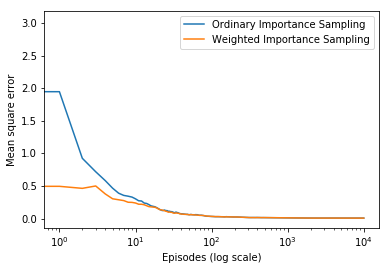

In [5]:
#if __name__=='__main__':
figure5_3()

In [17]:
#print(mpl.__version__)

In [16]:
#optimal_policy[:,:,0]